# Network Analysis with NetworkX

In this lecture, we'll introduce the NetworkX package for working with network data, and see how to perform some simple manipulations, visualizations, and analyses. 

For many more examples of working with NetworkX, see the gallery [here](https://networkx.org/documentation/stable/auto_examples/index.html). 

### A Note on Performance

NetworkX is an extremely accessible and popular package for working with network data. However, it's not the most *performant* package, and for complex operations on large graphs, other tools should often be prefered. A common recommendation is the [igraph](https://igraph.org/python/doc/tutorial/tutorial.html) package. For problems that are primarily mathematical in nature, working with matrix representations of graphs may be a better choice. 

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Graphs

A *graph* consists of a collection of objects (often *nodes* or *vertices*) along with a collection of connections between them (often called *edges* or *arcs*). Let's load in a famous example, which comes from the following classic paper: 

> Zachary W. (1977). An information flow model for conflict and fission in small groups. *Journal of Anthropological Research*, 33, 452-473

While normally we would need to read in some data (perhaps from CSV files) and create a graph ourselves, NetworkX actually comes bundled with this one already. 

In [2]:
G = nx.karate_club_graph()
G

We observe that the object we have just created is an object of class `Graph`, which has been imported through Networkx. We'll inspect its properties in a moment, but before we do, let's take a look at it. 


#### Visualization
The `nx.draw()` function uses Matplotlib behind the scenes to draw the graph. It's generally not the highest quality choice, but it is convenient. More sophisticated network visualizations can be constructed through other tools, many of which are interoperable with Networkx. One high quality choice is the [Bokeh package](http://holoviews.org/user_guide/Network_Graphs.html) for complex interactive graphics, while [Plotly](https://plotly.com/python/network-graphs/) also offers a good solution. For our purposes today, though, the built-in `nx.draw()` is fine. 

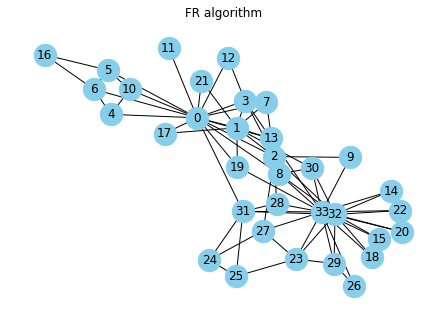

In [3]:
# Fruchterman Reingold
nx.draw(G, with_labels=True, node_size=500, 
        node_color="skyblue", 
        pos=nx.fruchterman_reingold_layout(G))

plt.title("FR algorithm")
plt.show()

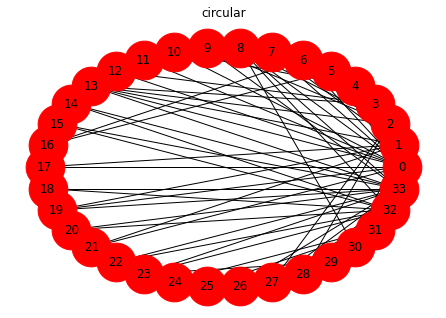

In [4]:
# Layout options: circular, random, spectral, spring

layout = [nx.circular_layout(G), nx.random_layout(G), nx.spectral_layout(G), nx.spring_layout(G)]

nx.draw(G, with_labels=True, node_size=1500, node_color="red", pos=nx.circular_layout(G))
plt.title("circular")
plt.show()

This graph is often called the "Karate Club Graph." Each node (blue dot) represents an individual member of a karate club. Edges between them are measurements of social ties by the researcher Zachary; informally, you can think of two connected nodes as being friends. 

We can easily extract iterators for nodes and edges: 

In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [6]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

An entry like `(8, 33)` in the list of edges indicates that there's an edge between the node labeled `8` and the node labeled `33`. 

When working with graphs, a fundamental task is to, given a node, obtain a list of its neighbors. NetworkX makes this easy: we essentially just treat the graph as a dictionary: 

In [7]:
G[4] # neighbors of node 4

AtlasView({0: {}, 6: {}, 10: {}})

In [8]:
list(G[4])

[0, 6, 10]

### Metadata

Usually, we have more to work with than just the "raw" graph. Both nodes and edges can have stored data. This data can be accessed and used in several different ways. For small graphs, one can get an overview this way: 

In [9]:
G.nodes(data = True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

Each node is now accompanied by a little dictionary of its attributes. It looks like all the nodes have an attribute called `club`, which has values `"Mr. Hi"` and `"Officer"`. We can access a dictionary of these attributes directly like this: 

In [10]:
clubs = nx.get_node_attributes(G, "club")
clubs

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

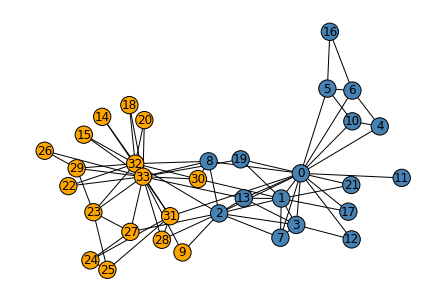

In [11]:
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        ) 

The reason that this data set is so famous is that it provides a relatively pure case study of the process of *graph fission.* In this case, the karate club studied eventually broke into two separate clubs after a conflict between the instructor ("Mr. Hi") and the club president ("Officer"). Node 0 is Mr. Hi himself, and Node 33 is the club president. As you can see, the two new clubs closely align with social relationships. This makes sense -- if you were going to go join a new club, you'd probably join the one where most of your friends were going.  

Indeed, this data set is often used as a benchmark for clustering algorithms which aim to split graphs into multiple, meaningful pieces. 

## Graph from data

In [12]:
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/datasets/facebook_combined.txt"
facebook = pd.read_csv(url, 
                       delimiter = " ",
                       names = ["source", "target"])

facebook

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


We use the following command to create graph from dataframe:
    
    from_pandas_edgelist(df, source='source', target='target', edge_attr=None, create_using=None, edge_key=None)

In [13]:
G = nx.from_pandas_edgelist(facebook)

This graph is much larger than the Karate Club graph from before.

In [14]:
len(G.nodes()), len(G.edges())

(4039, 88234)

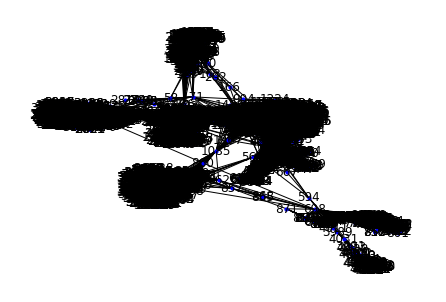

In [15]:
nx.draw(G, with_labels=True, node_size=10, node_color="blue", pos=nx.spring_layout(G))

You may realize that it takes long to run above code since the graph is large. Can we find a small graph? 

The `subgraph()` method can be used to filter down a network to just a desired set of nodes.

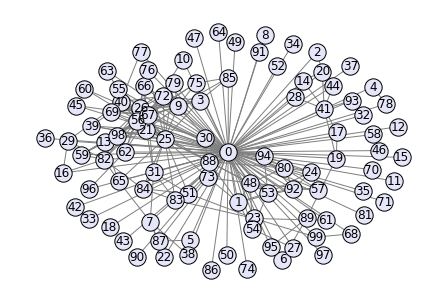

In [16]:
sub = G.subgraph(range(100))

layout = nx.spring_layout(sub)
nx.draw(sub, layout, 
        with_labels = True, 
        edge_color = "gray", 
        node_color = "lavender",
        edgecolors = "black")

## Node Degrees

One of the simplest and most important operations in network analysis is to determine the *degree* of a node. This is simply the number of edges attached to that node. In a social network like the one above, you might think of the degree as the popularity (number of friends) of the node. 

NetworkX makes it easy to compute the degree of a node. 

In [17]:
G.degree()

DegreeView({0: 347, 1: 17, 2: 10, 3: 17, 4: 10, 5: 13, 6: 6, 7: 20, 8: 8, 9: 57, 10: 10, 11: 1, 12: 1, 13: 31, 14: 15, 15: 1, 16: 9, 17: 13, 18: 1, 19: 16, 20: 15, 21: 65, 22: 11, 23: 17, 24: 16, 25: 69, 26: 68, 27: 5, 28: 13, 29: 13, 30: 17, 31: 23, 32: 6, 33: 2, 34: 5, 35: 2, 36: 11, 37: 1, 38: 9, 39: 15, 40: 44, 41: 24, 42: 2, 43: 1, 44: 6, 45: 12, 46: 5, 47: 2, 48: 22, 49: 4, 50: 11, 51: 7, 52: 2, 53: 31, 54: 8, 55: 17, 56: 78, 57: 15, 58: 12, 59: 19, 60: 8, 61: 3, 62: 26, 63: 6, 64: 7, 65: 12, 66: 15, 67: 76, 68: 9, 69: 10, 70: 2, 71: 3, 72: 24, 73: 10, 74: 1, 75: 14, 76: 3, 77: 6, 78: 9, 79: 12, 80: 23, 81: 3, 82: 34, 83: 7, 84: 13, 85: 14, 86: 6, 87: 13, 88: 20, 89: 8, 90: 2, 91: 8, 92: 21, 93: 8, 94: 22, 95: 6, 96: 9, 97: 3, 98: 49, 99: 13, 100: 9, 101: 19, 102: 6, 103: 16, 104: 32, 105: 14, 106: 8, 107: 1045, 108: 13, 109: 37, 110: 5, 111: 14, 112: 3, 113: 40, 114: 1, 115: 21, 116: 17, 117: 6, 118: 36, 119: 62, 120: 4, 121: 12, 122: 63, 123: 18, 124: 4, 125: 4, 126: 7, 127: 16

In [18]:
i = 0
print(f"The degree of node {i} is {G.degree(i)}.")

The degree of node 0 is 347.


## Degree Distributions

Networks in which nodes all have the same degree are called *regular networks,* and are, for the most part, mathematical fairytales. In real-world networks, nodes can often have very different degrees. A good way to visualize node degrees is by considering the degree distribution. This can be calculated easily using `nx.degree_histogram()`. 

In [19]:
hist = nx.degree_histogram(G)
hist[0:5]

[0, 75, 98, 93, 99]

The element `hist[i]` gives the number of nodes of degree `i`. So, the above says that there are zero nodes of degree 0, 75 nodes of degree 1, 98 nodes of degree 2, and so on. 

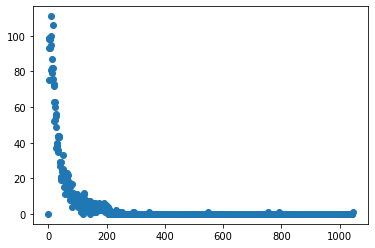

In [20]:
plt.scatter(np.arange(len(hist)), hist)

## Directed graph

A good example of a directed graph is Twitter or Instagram. You can follow a person but it doesn't mean that the respective person is following you back.

In [2]:
url = "https://philchodrow.github.io/PIC16A/homework/HW3-hamilton-data.csv"
df = pd.read_csv(url, names = ["source", "target"])
df.head()

,source,target
0,burr,hamilton
1,burr,weeks
2,burr,madison
3,burr,jay
4,burr,theodosiaDaughter


In [3]:
DG = nx.from_pandas_edgelist(df, 
                             source = "source", 
                             target = "target", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

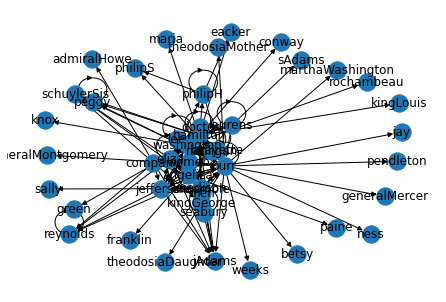

In [23]:
nx.draw(DG, with_labels = True)

Well, this isn't very legible. Let's filter out all the characters who are only mentioned, but never mention anyone themselves. The number of outgoing edges from a node is often called the out-degree.

In [4]:
out_degrees = DG.out_degree()
out_degrees

OutDegreeView({'burr': 22, 'hamilton': 21, 'weeks': 0, 'madison': 5, 'jay': 0, 'theodosiaDaughter': 0, 'betsy': 0, 'theodosiaMother': 0, 'washington': 9, 'marthaWashington': 0, 'schuylerSis': 0, 'generalMontgomery': 0, 'philipS': 0, 'peggy': 2, 'angelica': 8, 'eliza': 7, 'reynolds': 1, 'generalMercer': 0, 'jefferson': 9, 'jAdams': 0, 'ness': 0, 'pendleton': 0, 'philipH': 4, 'lafayette': 3, 'laurens': 6, 'mulligan': 3, 'lee': 2, 'conway': 0, 'kingGeorge': 2, 'eacker': 0, 'kingLouis': 0, 'maria': 0, 'ensemble': 6, 'company': 13, 'admiralHowe': 0, 'men': 5, 'women': 6, 'franklin': 0, 'paine': 0, 'rochambeau': 0, 'green': 0, 'knox': 0, 'sAdams': 0, 'sally': 0, 'seabury': 2, 'doctor': 1})

In [5]:
DG.in_degree()

InDegreeView({'burr': 14, 'hamilton': 15, 'weeks': 1, 'madison': 4, 'jay': 1, 'theodosiaDaughter': 1, 'betsy': 1, 'theodosiaMother': 1, 'washington': 10, 'marthaWashington': 1, 'schuylerSis': 6, 'generalMontgomery': 1, 'philipS': 2, 'peggy': 3, 'angelica': 8, 'eliza': 7, 'reynolds': 5, 'generalMercer': 1, 'jefferson': 9, 'jAdams': 9, 'ness': 1, 'pendleton': 1, 'philipH': 3, 'lafayette': 5, 'laurens': 2, 'mulligan': 3, 'lee': 4, 'conway': 1, 'kingGeorge': 4, 'eacker': 2, 'kingLouis': 1, 'maria': 1, 'ensemble': 0, 'company': 0, 'admiralHowe': 1, 'men': 0, 'women': 0, 'franklin': 1, 'paine': 1, 'rochambeau': 1, 'green': 1, 'knox': 1, 'sAdams': 1, 'sally': 1, 'seabury': 1, 'doctor': 0})

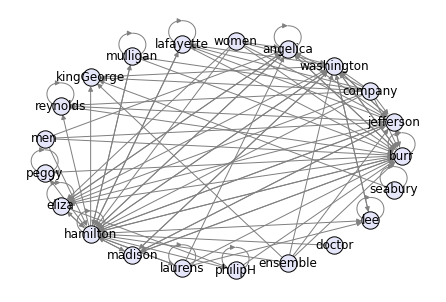

In [25]:
sub = DG.subgraph([name for name, val in out_degrees if val > 0])

layout = nx.circular_layout(sub)
nx.draw(sub, layout, 
        with_labels = True, 
        edge_color = "gray", 
        node_color = "lavender",
        edgecolors = "black")

## Create graph

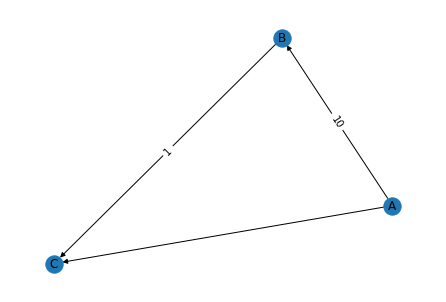

In [38]:
# create directed graph and add edges with weights
G = nx.DiGraph()

G.add_edge("A", "B", cost=10, weight=4, info=100, abc = 0, data=90)
G.add_edge("A", "C", weight=2)
G.add_edge("B", "C", cost=1, weight=5)


# visualization
pos = nx.spring_layout(G, seed=2)  # positions for all nodes - seed for reproducibility
nx.draw(G, pos, with_labels=True)  # it provides a basic drawing tool, see the next cell for advanced drawing tool

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "cost")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.show()

In [39]:
G.edges(data = True)

OutEdgeDataView([('A', 'B', {'cost': 10, 'weight': 4, 'info': 100, 'abc': 0, 'data': 90}), ('A', 'C', {'weight': 2}), ('B', 'C', {'cost': 1, 'weight': 5})])

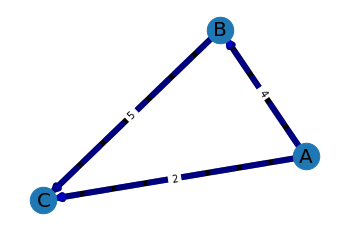

In [40]:
pos = nx.spring_layout(G, seed=2)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_edges(
    G, pos, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.show()

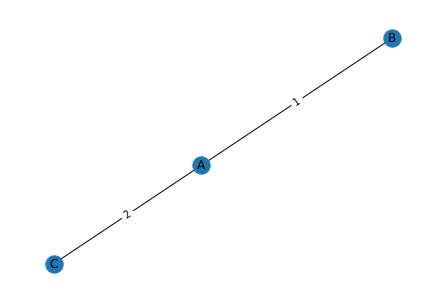

In [41]:
# Undirected graph

G1 = nx.Graph()

G1.add_edge("A", "B", cost=4, weight=1)
G1.add_edge("A", "C", cost=2, weight=2)

# visualization
pos = nx.spring_layout(G1, seed=2)  # positions for all nodes - seed for reproducibility
nx.draw(G1, pos, with_labels=True)  # it provides a basic drawing tool, see the next cell for advanced drawing tool

# edge weight labels
edge_labels = nx.get_edge_attributes(G1, "weight")
nx.draw_networkx_edge_labels(G1, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.show()

# Network data science

Networks are extremely rich data structures which admit a wide variety of insightful data analysis tasks. In this set of notes, we'll consider two of the fundamental tasks in network data science: centrality and clustering. We'll also get a bit more practice with network visualization. 

We'll mostly stick with the Karate Club network for today, as this is a very good network for visualization. 

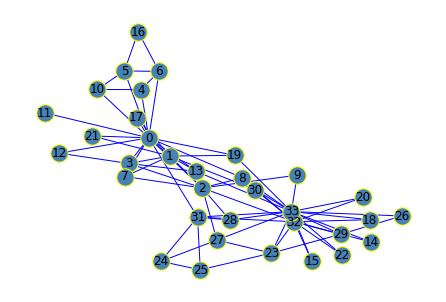

In [42]:
G = nx.karate_club_graph()
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, 
        layout, 
        with_labels=True, 
        node_color = "steelblue",
        edgecolors = "yellow",
        edge_color = "blue")

## Centrality in Networks

Given a system, how can we determine *important* components in that system? In networks, the idea of importance is often cashed out in terms of *centrality*: important nodes are the nodes that are most "central" to the network. But how should we define or measure this? 

One good way is by computing the degree (i.e. the number of friends possessed by each node). 

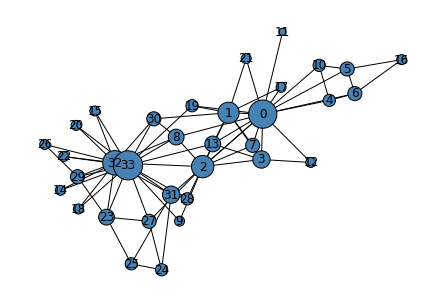

In [27]:
deg = G.degree()
nx.draw(G, layout,
        with_labels=True, 
        node_color = "steelblue",
        node_size  = [50*deg[i] for i in G.nodes()],
        edgecolors = "black")

The degree is a direct measure of popularity. But what if it matters not only *how many* friends you have, but *who* those friends are? Maybe we'd like to measure importance using the following, apparently circular idea: 

> Central nodes tend to be connected to other central nodes. 

As it turns out, one way to cash out this idea is in terms of...linear algebra! In particular, let's suppose that *my* importance should be proportional to the sum of the importances of my friends. So, if $v_i$ is the importance of node $i$, then we can write 

$$ v_i = \alpha\sum_{j \;\text{friends with} \;i} v_j\;, $$

where $\alpha$ is some constant of proportionality. Let's write this up a little more concisely. Let $\mathbf{A} \in \mathbb{R}^{n \times n}$ be the *adjacency* matrix, with entries 

$$ a_{ij} = \begin{cases}1 &\quad i \;\text{is friends with} \;j \\ 0 &\quad \text{otherwise.}\end{cases}$$

Now, our equation above can be written in matrix-vector form as: 

$$\mathbf{v} = \alpha \mathbf{A} \mathbf{v}$$. 

Wait! This says that $\mathbf{v}$ is an eigenvector of $\mathbf{A}$ with eigenvalue $\frac{1}{\alpha}$! So, we can compute centralities by finding eigenvectors of $\mathbf{A}$. Usually, we just take the largest one (why?).

Answer:
Since the entries in the adjacency matrix are non-negative, there is a unique largest eigenvalue, which is real and positive, by the Perron–Frobenius theorem.

Let's try it out! Our first step is to obtain the adjacency matrix $\mathbf{A}$.  

In [43]:
# get adjancency matrix
nx.adjacency_matrix(G)

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

In [44]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 1],
        [0, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]])

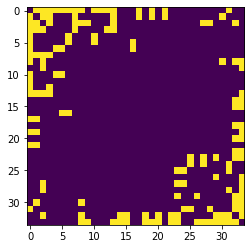

In [30]:
A = np.array(nx.adjacency_matrix(G).todense())
plt.imshow(A)

In [31]:
S,D = np.linalg.eigh(A)
print(S)
print(D)

[-4.48722919e+00 -3.44793486e+00 -3.11069092e+00 -2.43742443e+00
 -2.09082295e+00 -2.00000000e+00 -1.68768945e+00 -1.44407374e+00
 -1.19242425e+00 -1.04208785e+00 -7.92406815e-01 -4.18818748e-01
 -1.41161387e-15 -1.03172327e-15 -6.47894987e-16 -4.96393987e-16
 -3.32087949e-16  1.18282106e-16  4.22335646e-16  5.93393843e-16
  1.33608579e-15  1.83622556e-15  2.99410685e-01  4.19729474e-01
  6.15840589e-01  8.34304102e-01  1.03145042e+00  1.08328639e+00
  1.45305566e+00  1.48615954e+00  2.30908767e+00  2.91650670e+00
  4.97707423e+00  6.72569773e+00]
[[ 0.31716992 -0.27730159  0.55468453 ... -0.19785758  0.38686107
  -0.35549144]
 [ 0.12496128 -0.10787731  0.01703733 ...  0.25029731  0.26893952
  -0.26595992]
 [ 0.02726159  0.53924221  0.13327895 ...  0.2466749   0.13115956
  -0.3171925 ]
 ...
 [-0.26735819  0.18302254 -0.01093306 ... -0.14613828 -0.10223455
  -0.19103384]
 [ 0.281354   -0.33230442 -0.36967755 ... -0.03723557 -0.32455583
  -0.30864422]
 [ 0.52093712  0.32343689 -0.1354469

In [32]:
eig_centrality = D[:,-1]
eig_centrality

array([-0.35549144, -0.26595992, -0.3171925 , -0.21117972, -0.07596882,
       -0.07948305, -0.07948305, -0.17095975, -0.22740391, -0.10267425,
       -0.07596882, -0.0528557 , -0.08425463, -0.22647272, -0.10140326,
       -0.10140326, -0.02363563, -0.09239954, -0.10140326, -0.14791251,
       -0.10140326, -0.09239954, -0.10140326, -0.15011857, -0.05705244,
       -0.05920647, -0.07557941, -0.13347715, -0.13107782, -0.13496082,
       -0.1747583 , -0.19103384, -0.30864422, -0.37336347])

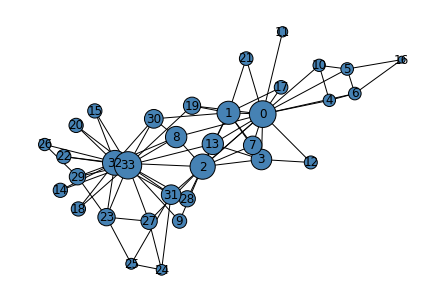

In [33]:
nx.draw(G, layout,
        with_labels=True, 
        node_color = "steelblue", 
        node_size  = [-2000*eig_centrality],
        edgecolors = "black")

## PageRank

PageRank is an algorithm for finding important entities in a complex, relational system. In fact, it's a form of centrality! While we could obtain the adjacency matrix and do the linear algebra manipulations to compute PageRank, an easier way is to use one of the many centrality measures built in to NetworkX.

In [37]:
PR = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)
PR

{0: 0.09700181758983706,
 1: 0.052878391037427,
 2: 0.05707842304763673,
 3: 0.035860643223064786,
 4: 0.021979406974834498,
 5: 0.02911334166344221,
 6: 0.029113341663442205,
 7: 0.02449075803950918,
 8: 0.029765339186167028,
 9: 0.014308950284462798,
 10: 0.021979406974834494,
 11: 0.009564916863537146,
 12: 0.014645186487916188,
 13: 0.02953631497720298,
 14: 0.014535161524273824,
 15: 0.014535161524273824,
 16: 0.016785378110253487,
 17: 0.01455885977424349,
 18: 0.014535161524273824,
 19: 0.01960441671193729,
 20: 0.014535161524273824,
 21: 0.01455885977424349,
 22: 0.014535161524273824,
 23: 0.03152091531163227,
 24: 0.021075455001162945,
 25: 0.02100562817474579,
 26: 0.015043395360629753,
 27: 0.025638803528350497,
 28: 0.019572960509438537,
 29: 0.026287262837112076,
 30: 0.024589336534292478,
 31: 0.037156635922679405,
 32: 0.07169213006588289,
 33: 0.1009179167487121}

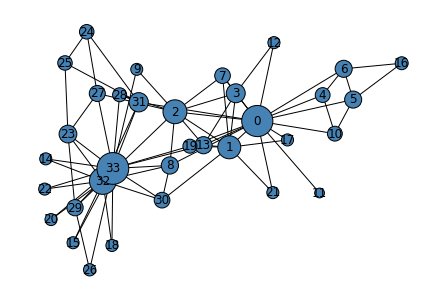

In [38]:
nx.draw(G, layout,
        with_labels=True, 
        node_color = "steelblue", 
        node_size  = [10000*PR[i] for i in G.nodes()],
        edgecolors = "black")

Different centrality measures have different mathematical definitions and properties, which means that appropriately interpreting a given measure can be somewhat tricky. One should be cautious before leaping to conclusions about "the most important node in the network." For example, the results look noticeably different when we use betweenness centrality, a popular heuristic that considers nodes to be more important if they are "between" lots of pairs of other nodes. 

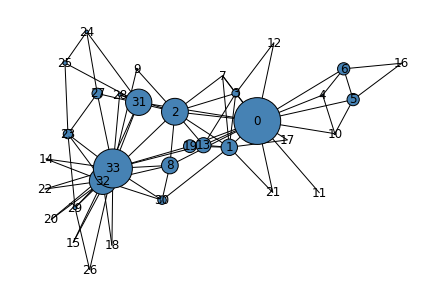

In [39]:
bc = nx.algorithms.centrality.betweenness_centrality(G)

nx.draw(G, layout,
        with_labels=True, 
        node_color = "steelblue", 
        node_size  = [5000*bc[i] for i in G.nodes()],
        edgecolors = "black")

## Graph Clustering

Graph clustering refers to the problem of finding collections of related nodes in the graph. It is one form of unsupervised machine learning, and is similar to problems that you may have seen like k-means and spectral clustering. Indeed, spectral clustering works well on graphs! 

As mentioned above, a common benchmark for graph clustering algorithms is to attempt to reproduce the observed division of the Karate Club graph. Recall that that looks like this: 

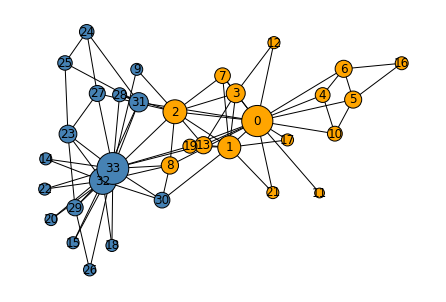

In [40]:
clubs = nx.get_node_attributes(G, "club")

nx.draw(G, layout,
        with_labels=True, 
        node_color = ["steelblue" if clubs[i] == "Officer" else "orange" for i in G.nodes()],
        node_size  = [10000*PR[i] for i in G.nodes()],
        edgecolors = "black")

The core idea of most clustering algorithms is that densely-connected sets of nodes are more likely to be members of the same cluster. There are *many* algorithms for graph clustering, which can lead to very different results. 

Here's one example. 

In [41]:
comms = nx.algorithms.community.label_propagation.label_propagation_communities(G)
comms = list(comms)
comms

[{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30, 32, 33},
 {5, 6, 16}]

The variable `comms` is now a list of sets. Nodes in the same set are viewed as belonging to the same cluster. Let's visualize these: 

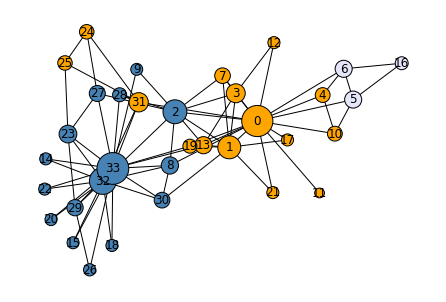

In [42]:
labels = {j : i for j in G.nodes() for i in range(len(comms)) if j in comms[i]}

color_possibilities = ["orange", "steelblue", "lavender"]
colors = [color_possibilities[labels[j]] for j in G.nodes]

nx.draw(G, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [10000*PR[i] for i in G.nodes()],
        edgecolors = "black")

The result is clearly related to the observed partition, but we haven't recovered it exactly. Indeed, the algorithm picked up 3 clusters, when the clut only divided into two components! Some algorithms allow you to specify the desired number of clusters in advance, while others don't. 

What about our good friend, spectral clustering? The adjacency matrix of the graph actually can serve as the affinity or similarity matrix we used when studying point blogs. In fact, spectral clustering is often presented as an algorithm for graphs. 

There's no implementation of spectral clustering within NetworkX, but it's easy enough to obtain the adjacency matrix and use the implementation in Scikit-learn`: 

In [46]:
A = nx.adjacency_matrix(G)
from sklearn.cluster import SpectralClustering
SC = SpectralClustering(2, affinity = "precomputed")
labels = SC.fit_predict(A)

In [47]:
labels

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [45]:
colors = [color_possibilities[labels[j]] for j in G.nodes]

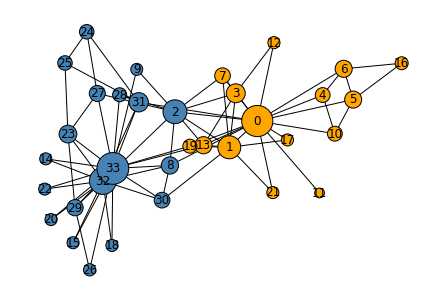

In [46]:
nx.draw(G, layout,
        with_labels=True, 
        node_color = colors,
        node_size  = [10000*PR[i] for i in G.nodes()],
        edgecolors = "black")

The resulting clusters are fairly similar to the "real" clusters observed in the fracturing of the club. However, fundamentally, graph clustering is an *unsupervised* machine learning task, which means that the problem of defining what makes a "good" set of clusters is quite subtle and depends strongly on the data domain. 